# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [8]:
cities

['thompson',
 'rikitea',
 'aklavik',
 'mataura',
 'dikson',
 'khatanga',
 'atuona',
 'rocha',
 'sur',
 'severo-kurilsk',
 'mrirt',
 'hami',
 'saint-philippe',
 'yumen',
 'saleaula',
 'upernavik',
 'kavieng',
 'ossora',
 'new norfolk',
 'barrow',
 'hobart',
 'batticaloa',
 'teahupoo',
 'coos bay',
 'ushuaia',
 'vaini',
 'findlay',
 'jamestown',
 'ilulissat',
 'cape town',
 'saint anthony',
 'westport',
 'hithadhoo',
 'kashan',
 'richards bay',
 'nguiu',
 'saint george',
 'cabo san lucas',
 'mehamn',
 'bethel',
 'grindavik',
 'illoqqortoormiut',
 'lagoa',
 'lompoc',
 'bredasdorp',
 'arraial do cabo',
 'kaitangata',
 'dese',
 'timizart',
 'bluff',
 'kawalu',
 'baker city',
 'kodiak',
 'egvekinot',
 'clyde river',
 'flinders',
 'sentyabrskiy',
 'goya',
 'colesberg',
 'marcona',
 'esperance',
 'busselton',
 'tsihombe',
 'yulara',
 'dogondoutchi',
 'qaanaaq',
 'ribeira grande',
 'havre-saint-pierre',
 'hermanus',
 'maracacume',
 'sabha',
 'punta arenas',
 'port hardy',
 'farah',
 'enshi',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# set base url, units for query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# create list to store called data
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# loop through cities
# creating record counter
i = 1
for city in cities:
    
    # get weather data for cities
    response_json = requests.get(query_url + city).json()
    
    # set up error handling and print of list  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)   
        city_name = response_json['name']
        city_name_list.append(city_name)
        country_name = response_json['sys']['country']
        country_list.append(country_name)
        lng = response_json['coord']['lon']
        lng_list.append(lng)
        lat = response_json['coord']['lat']
        lat_list.append(lat)
        temp = response_json['main']['temp']
        temp_list.append(temp)
        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)
        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)
        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"Processing record {i}|City Name: {city}, City ID: {city_id}")
        i += 1
    
    # print exception for cities with no data
    except:
        
        print("No record of city requested, moving to next city")

Processing record 1|City Name: thompson, City ID: 6165406
Processing record 2|City Name: rikitea, City ID: 4030556
Processing record 3|City Name: aklavik, City ID: 5882953
Processing record 4|City Name: mataura, City ID: 6201424
Processing record 5|City Name: dikson, City ID: 1507390
Processing record 6|City Name: khatanga, City ID: 2022572
Processing record 7|City Name: atuona, City ID: 4020109
Processing record 8|City Name: rocha, City ID: 3440777
Processing record 9|City Name: sur, City ID: 286245
Processing record 10|City Name: severo-kurilsk, City ID: 2121385
No record of city requested, moving to next city
Processing record 11|City Name: hami, City ID: 1529484
Processing record 12|City Name: saint-philippe, City ID: 935215
Processing record 13|City Name: yumen, City ID: 1528998
No record of city requested, moving to next city
Processing record 14|City Name: upernavik, City ID: 3418910
Processing record 15|City Name: kavieng, City ID: 2094342
Processing record 16|City Name: ossora

Processing record 128|City Name: halifax, City ID: 6324729
Processing record 129|City Name: pietarsaari, City ID: 642455
Processing record 130|City Name: latung, City ID: 1707108
Processing record 131|City Name: biltine, City ID: 244878
Processing record 132|City Name: mancio lima, City ID: 3663516
No record of city requested, moving to next city
Processing record 133|City Name: pringsewu, City ID: 1630639
Processing record 134|City Name: port hedland, City ID: 2063042
No record of city requested, moving to next city
Processing record 135|City Name: brae, City ID: 2654970
Processing record 136|City Name: noyabrsk, City ID: 1496503
Processing record 137|City Name: norman wells, City ID: 6089245
Processing record 138|City Name: valls, City ID: 3106492
Processing record 139|City Name: carmaux, City ID: 3028580
Processing record 140|City Name: le port, City ID: 935616
Processing record 141|City Name: kaeo, City ID: 2189343
Processing record 142|City Name: kristiinankaupunki, City ID: 65076

Processing record 251|City Name: camacha, City ID: 2270385
Processing record 252|City Name: amahai, City ID: 1651591
Processing record 253|City Name: itiuba, City ID: 3460548
Processing record 254|City Name: sabirabad, City ID: 585187
Processing record 255|City Name: lata, City ID: 2738381
Processing record 256|City Name: komsomolskiy, City ID: 1513491
Processing record 257|City Name: jutai, City ID: 3663693
Processing record 258|City Name: raska, City ID: 793790
Processing record 259|City Name: hearst, City ID: 5973108
Processing record 260|City Name: talas, City ID: 299900
Processing record 261|City Name: xacmaz, City ID: 584717
Processing record 262|City Name: paita, City ID: 3694112
Processing record 263|City Name: torbay, City ID: 6167817
Processing record 264|City Name: cabra, City ID: 2520645
Processing record 265|City Name: roma, City ID: 5134295
Processing record 266|City Name: smoky lake, City ID: 6150293
Processing record 267|City Name: wilmington, City ID: 4499379
Processin

Processing record 382|City Name: troitsko-pechorsk, City ID: 481548
Processing record 383|City Name: englewood, City ID: 5421250
Processing record 384|City Name: zubova polyana, City ID: 462050
Processing record 385|City Name: ladario, City ID: 3459352
Processing record 386|City Name: svetlyy, City ID: 485660
Processing record 387|City Name: ambilobe, City ID: 1082243
Processing record 388|City Name: turukhansk, City ID: 1488903
Processing record 389|City Name: takaka, City ID: 2181997
Processing record 390|City Name: shimoda, City ID: 1852357
Processing record 391|City Name: chyhyryn, City ID: 710473
Processing record 392|City Name: leshukonskoye, City ID: 535839
Processing record 393|City Name: waitati, City ID: 2179825
Processing record 394|City Name: guararema, City ID: 3461871
Processing record 395|City Name: sao francisco de assis, City ID: 3449124
Processing record 396|City Name: mahibadhoo, City ID: 1337605
Processing record 397|City Name: zhangye, City ID: 1785036
Processing r

Processing record 511|City Name: kyra, City ID: 2021041
Processing record 512|City Name: saint-augustin, City ID: 6137462
Processing record 513|City Name: aquiraz, City ID: 3407407
Processing record 514|City Name: saltpond, City ID: 2295672
Processing record 515|City Name: tanout, City ID: 2439155
Processing record 516|City Name: hobyo, City ID: 57000
Processing record 517|City Name: kropotkin, City ID: 540761
Processing record 518|City Name: lincoln, City ID: 5072006
Processing record 519|City Name: borogontsy, City ID: 2026160
Processing record 520|City Name: tawau, City ID: 1734199
Processing record 521|City Name: tongren, City ID: 1792592
Processing record 522|City Name: tairua, City ID: 2182010
Processing record 523|City Name: shelburne, City ID: 6145890
Processing record 524|City Name: barillas, City ID: 3599575
Processing record 525|City Name: aransas pass, City ID: 4671141
Processing record 526|City Name: emerald, City ID: 2167426
Processing record 527|City Name: husavik, City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# convert data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,6165406,Thompson,CA,55.7435,-97.8558,23.16,93,90,4.61
1,4030556,Rikitea,PF,-23.1203,-134.9692,72.95,74,99,11.50
2,5882953,Aklavik,CA,68.2191,-135.0107,17.60,93,90,12.66
3,6201424,Mataura,NZ,-46.1927,168.8643,46.96,100,100,1.21
4,1507390,Dikson,RU,73.5069,80.5464,-2.76,91,99,9.84


In [12]:
# export to .csv file
cities_df.to_csv("output_data/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
humidity_check = pd.read_csv("output_data/city_weather.csv")
pd.options.display.max_rows = 999
humidity_check.head(999)

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,6165406,Thompson,CA,55.7435,-97.8558,23.16,93,90,4.61
1,4030556,Rikitea,PF,-23.1203,-134.9692,72.95,74,99,11.50
2,5882953,Aklavik,CA,68.2191,-135.0107,17.60,93,90,12.66
3,6201424,Mataura,NZ,-46.1927,168.8643,46.96,100,100,1.21
4,1507390,Dikson,RU,73.5069,80.5464,-2.76,91,99,9.84
5,2022572,Khatanga,RU,71.9667,102.5000,-13.58,89,75,5.73
6,4020109,Atuona,PF,-9.8000,-139.0333,78.57,63,20,14.25
7,3440777,Rocha,UY,-34.4833,-54.3333,73.99,47,0,17.34
8,286245,Sur,OM,22.5667,59.5289,76.68,48,4,3.65
9,2121385,Severo-Kuril'sk,RU,50.6789,156.1250,38.59,76,74,18.21


In [15]:
#  Get the indices of cities that have humidity over 100%.
# no data available to do check

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# no data available to do check

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

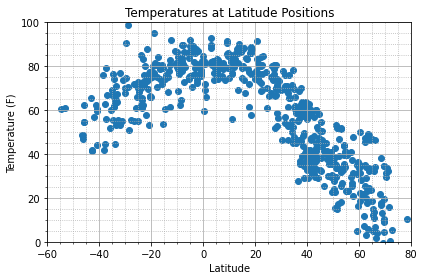

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/lat_temp.png")

## Latitude vs. Humidity Plot

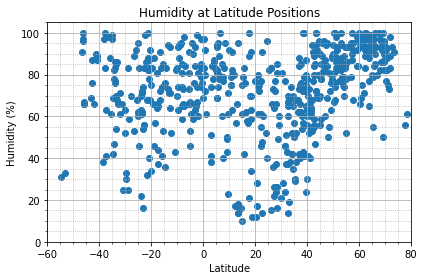

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/lat_hum.png")

## Latitude vs. Cloudiness Plot

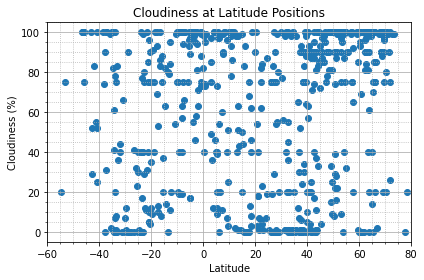

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/lat_cloud.png")

## Latitude vs. Wind Speed Plot

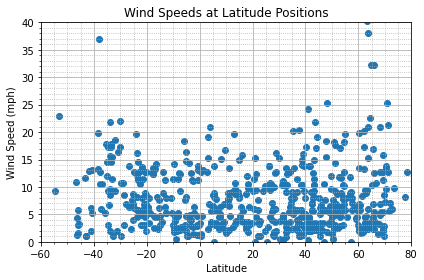

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/lat_ws.png")

## Linear Regression

In [21]:
# define linear regression equation for ease of plotting linear regression for each chart
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

# create northern and southern hemisphere dataframes
northern_hemisphere = cities_df.loc[cities_df["Lat"]>0]
southern_hemisphere = cities_df.loc[cities_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8839782724084029


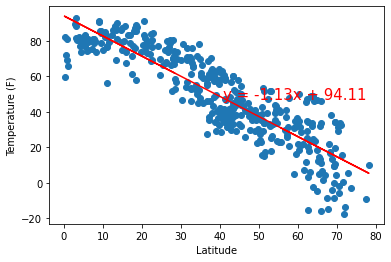

None


In [22]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]
plt.ylabel("Temperature (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6825625747140565


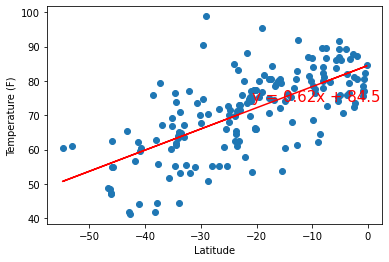

None


In [23]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]
plt.ylabel("Temperature (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.407445880233572


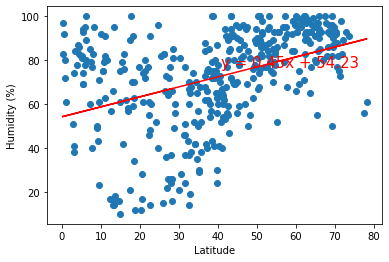

None


In [24]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08404845087043403


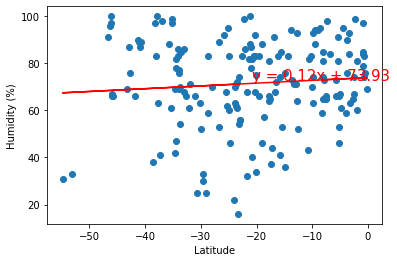

None


In [25]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22169764956124313


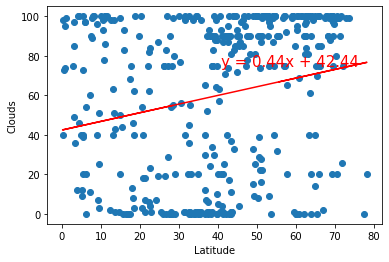

None


In [26]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]
plt.ylabel("Clouds")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19450558780989494


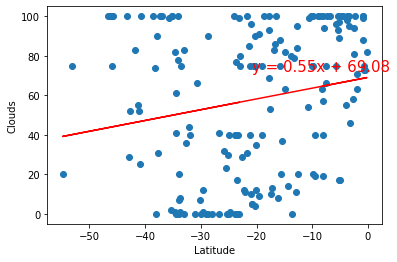

None


In [27]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]
plt.ylabel("Clouds")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13715071259473796


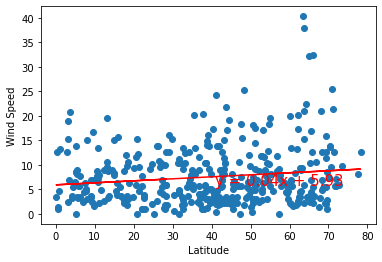

None


In [28]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24240028110811976


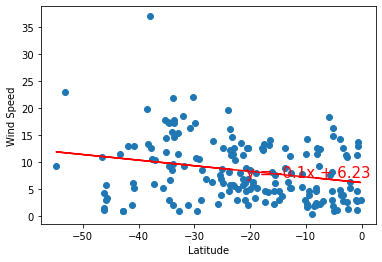

None


In [29]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))